In [9]:
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

In [10]:
model = YOLO('datasets/bioview-lizards_TRAIN/run/train/weights/best.pt')

In [11]:
img_path = 'datasets/bioview-lizards_TRAIN/dataset/validation/images/img_20230729_223004.jpg'


image 1/1 /home/qcienmed/mmr689/yolo-consumptions/datasets/bioview-lizards_TRAIN/dataset/validation/images/img_20230729_223004.jpg: 512x640 2 Lizards, 5.3ms
Speed: 2.2ms preprocess, 5.3ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


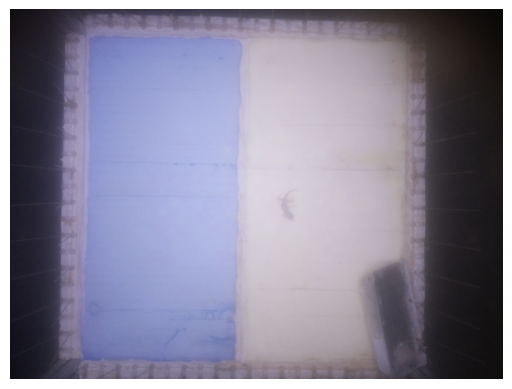

In [12]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model.predict(img_path)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score >= 0.5:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
        cv2.putText(img_rgb, str(round(score,1)), (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 3, cv2.LINE_AA)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()